# TIME SERIES ANALYSIS WITH RNN & LSTM ON YAHOO! FINANACE DATASET

## Importing Libraries

In [1]:
import pandas as pd

# import dataset (YAHOO FINANCE)

In [3]:
df = pd.read_csv("data/^GSPTSE.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-08-19,15339.500000,15496.299805,15339.500000,15477.200195,15477.200195,126247600
1,2014-08-20,15477.700195,15570.500000,15425.799805,15562.000000,15562.000000,140333600
2,2014-08-21,15561.700195,15566.500000,15526.000000,15556.099609,15556.099609,123912100
3,2014-08-22,15556.099609,15574.200195,15495.099609,15535.599609,15535.599609,102244500
4,2014-08-25,15535.900391,15624.000000,15535.900391,15598.700195,15598.700195,101680900


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2.509000e+03
mean,17136.731367,17208.100859,17055.204632,17134.682307,17134.682307,2.276183e+08
std,2676.711133,2684.404818,2674.277295,2680.439954,2680.439954,7.862513e+07
min,11657.299805,11870.599609,11172.700195,11228.500000,11228.500000,0.000000e+00
25%,15119.500000,15173.400391,15053.099609,15119.299805,15119.299805,1.861656e+08
50%,16276.200195,16325.099609,16214.799805,16274.099609,16274.099609,2.159402e+08
75%,19862.599609,19943.400391,19775.800781,19873.300781,19873.300781,2.525027e+08
max,23105.300781,23209.699219,22984.400391,23110.800781,23110.800781,9.440374e+08


In [7]:
data = df.copy()

In [10]:
data = data.drop("Date",axis=1)

In [11]:
data.iloc[:,:1] 

,Open
0,15339.500000
1,15477.700195
2,15561.700195
3,15556.099609
4,15535.900391
...,...
2504,22341.400391
2505,22439.699219
2506,22620.900391
2507,22877.599609


In [12]:
# Setting 80 percent data for training
import math

training_data_len = math.ceil(len(data) * .8)
training_data_len 

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:1] 
test_data = data[training_data_len:].iloc[:,:1]
print(train_data.shape, test_data.shape)


(2008, 1) (501, 1)


In [14]:
train_data.head()

,Open
0,15339.500000
1,15477.700195
2,15561.700195
3,15556.099609
4,15535.900391


In [16]:
# Selecting Open Price values
import numpy as np

dataset_train = train_data.Open.values 
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1)) 
dataset_train.shape


(2008, 1)

In [17]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])


[[0.35228277]
 [0.36550463]
 [0.37354106]
 [0.37300524]
 [0.37107275]]


In [18]:
# Selecting Open Price values
dataset_test = test_data.Open.values 
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1)) 
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test) 
print(*scaled_test[:5])


[0.43254631] [0.38049144] [0.39049825] [0.38919654] [0.41859493]


In [37]:
days_len = 14

In [44]:
X_train = []
y_train = []
for i in range(days_len, len(scaled_train)):
	X_train.append(scaled_train[i-days_len:i, 0])
	y_train.append(scaled_train[i, 0])
	if i <= days_len+1:
		print(X_train)
		print(y_train)
		print()


[array([0.35228277, 0.36550463, 0.37354106, 0.37300524, 0.37107275,
       0.37715744, 0.37904219, 0.37728179, 0.37320621, 0.37977888,
       0.37903257, 0.3827064 , 0.37498567, 0.37432559])]
[0.3686043415868263]

[array([0.35228277, 0.36550463, 0.37354106, 0.37300524, 0.37107275,
       0.37715744, 0.37904219, 0.37728179, 0.37320621, 0.37977888,
       0.37903257, 0.3827064 , 0.37498567, 0.37432559]), array([0.36550463, 0.37354106, 0.37300524, 0.37107275, 0.37715744,
       0.37904219, 0.37728179, 0.37320621, 0.37977888, 0.37903257,
       0.3827064 , 0.37498567, 0.37432559, 0.36860434])]
[0.3686043415868263, 0.3711587977401416]



In [45]:
X_test = []
y_test = []
for i in range(days_len, len(scaled_test)):
	X_test.append(scaled_test[i-days_len:i, 0])
	y_test.append(scaled_test[i, 0])


In [46]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)


X_train : (1994, 14, 1) y_train : (1994, 1)


In [47]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)


X_test : (487, 14, 1) y_test : (487, 1)


In [23]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error


# RNN model

In [48]:
# initializing the RNN
rnn_model = Sequential()

# adding RNN layers and dropout regularization
rnn_model.add(SimpleRNN(units = 50, activation = "tanh",return_sequences = True,input_shape = (X_train.shape[1],1)))

rnn_model.add(Dropout(0.2))

rnn_model.add(SimpleRNN(units = 50, activation = "tanh",return_sequences = True))

rnn_model.add(SimpleRNN(units = 50,activation = "tanh",return_sequences = True))

rnn_model.add( SimpleRNN(units = 50))

# adding the output layer
rnn_model.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
rnn_model.compile(optimizer = SGD(learning_rate=0.01,decay=1e-6,momentum=0.9,nesterov=True),loss = "mean_squared_error")

# fitting the model
rnn_model.fit(X_train, y_train, epochs = 20, batch_size = 2)
rnn_model.summary()


c:\Users\ali60\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\ali60\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/20
997/997 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - loss: 0.0068
Epoch 2/20
997/997 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0016
Epoch 3/20
997/997 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0013
Epoch 4/20
997/997 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 9.9755e-04
Epoch 5/20
997/997 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 8.8237e-04
Epoch 6/20
997/997 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 8.2574e-04
Epoch 7/20
997/997 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 8.7316e-04
Epoch 8/20
997/997 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 7.4200e-04
Epoch 9/20
997/997 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 7.0920e-04
Epoch 10/20
997/997 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 6.9289e-04
Epoch 11/20
997/997 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 6.8331e-04
Epoch 12/20
997/997 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 6.3784e-04
Epoch 13/20
997/997 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 5.9081e-04
Epoch 14/20
997/997 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - lo

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 14, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 14, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 14, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

# LSTM Model

In [53]:
#Initialising the model
model_LSTM = Sequential()

#Adding LSTM layers
model_LSTM.add(LSTM(50, 
					return_sequences = True, 
					input_shape = (X_train.shape[1],1)))
model_LSTM.add(LSTM(50, 
					return_sequences = False))
model_LSTM.add(Dense(25))

#Adding the output layer
model_LSTM.add(Dense(1))

#Compiling the model
model_LSTM.compile(optimizer = 'adam',
					loss = 'mean_squared_error',
					metrics = ["accuracy"])

#Fitting the model
model_LSTM.fit(X_train, 
				y_train, 
				batch_size = 1, 
				epochs = 12)
model_LSTM.summary()


c:\Users\ali60\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/12
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 9.9246e-04 - loss: 0.0068
Epoch 2/12
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.0012 - loss: 0.0010
Epoch 3/12
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 4.0938e-04 - loss: 4.7445e-04
Epoch 4/12
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.0029 - loss: 4.5079e-04
Epoch 5/12
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 5.9879e-04 - loss: 3.3657e-04
Epoch 6/12
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 3.1653e-04 - loss: 4.3201e-04
Epoch 7/12
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 4.4324e-04 - loss: 3.3591e-04
Epoch 8/12
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 3.8945e-04 - loss: 3.5328e-04
Epoch 9/12
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.0043 - loss: 3.3722e-04
Epoch 10/12
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 2.7374e-04 - loss: 3.0140e-04
Epoch 11/12
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 16s 8m

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 14, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

In [54]:
# predictions with X_test data
y_RNN = rnn_model.predict(X_test)
y_LSTM = model_LSTM.predict(X_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [55]:
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN) 
y_LSTM_O = scaler.inverse_transform(y_LSTM) 


In [82]:
y_RNN_O[0][-1]

19037.773

In [85]:
y_LSTM_O

array([[19221.05 ],
       [19603.389],
       [19915.969],
       [19699.477],
       [19690.727],
       [19634.97 ],
       [19379.668],
       [19206.113],
       [19517.521],
       [19461.168],
       [19268.447],
       [18756.19 ],
       [18438.217],
       [18534.688],
       [18349.639],
       [18590.309],
       [18495.367],
       [18673.35 ],
       [19201.387],
       [19236.25 ],
       [19183.086],
       [18869.188],
       [18416.512],
       [18230.766],
       [18016.951],
       [18748.994],
       [18558.797],
       [18921.92 ],
       [18733.574],
       [18723.924],
       [18592.326],
       [18948.828],
       [18867.31 ],
       [19121.473],
       [19392.344],
       [19359.428],
       [19411.91 ],
       [19674.682],
       [19474.807],
       [19138.598],
       [19491.984],
       [19508.47 ],
       [19577.617],
       [19566.195],
       [19724.91 ],
       [20091.95 ],
       [20029.402],
       [20101.795],
       [19908.66 ],
       [19780.02 ],


In [84]:
test_data

,Open
2008,20184.900391
2009,19917.000000
2010,19968.500000
2011,19961.800781
2012,20113.099609
...,...
2504,22341.400391
2505,22439.699219
2506,22620.900391
2507,22877.599609


In [27]:
import matplotlib.pyplot as plt

In [73]:
# df['Date'].to_timestamp()

date_col = pd.to_datetime(df['Date'])

len(date_col[150:2008])

1858

In [68]:
train_data.Open

0       15339.500000
1       15477.700195
2       15561.700195
3       15556.099609
4       15535.900391
            ...     
2003    20051.400391
2004    20061.400391
2005    20182.199219
2006    20191.699219
2007    20230.599609
Name: Open, Length: 2008, dtype: float64

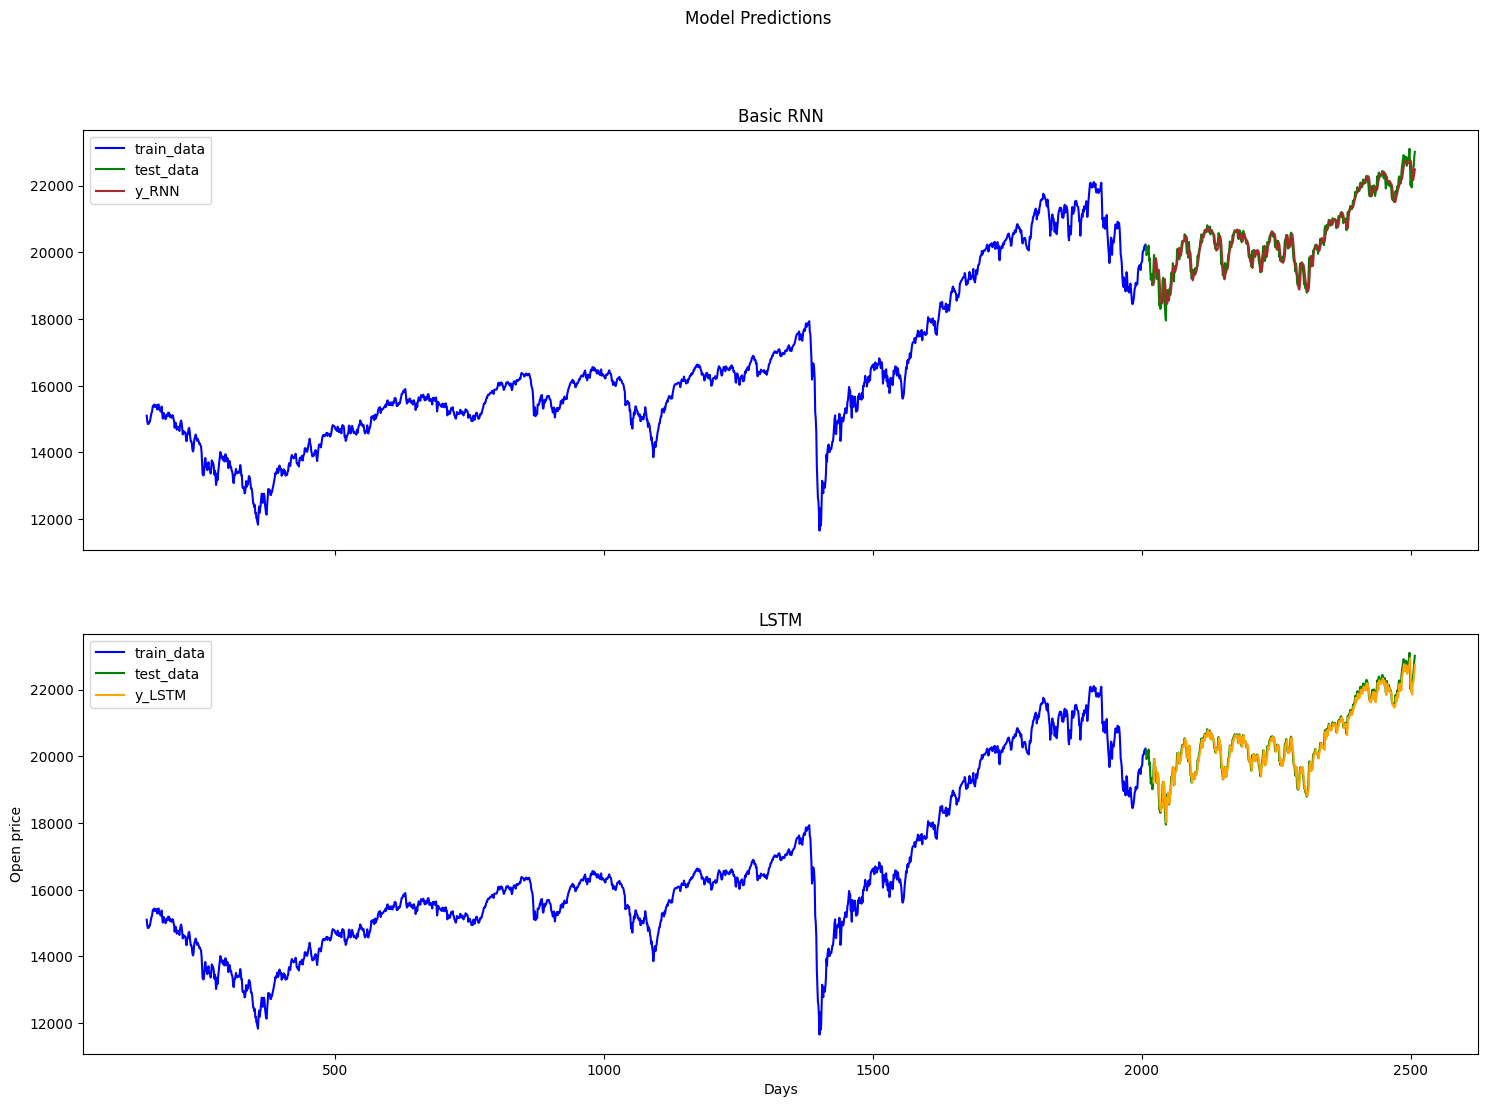

In [76]:
fig, axs = plt.subplots(2,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[0].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[0].plot(test_data.index[days_len:], y_RNN_O, label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")

#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[1].plot(test_data.index[days_len:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")


plt.xlabel("Days")
plt.ylabel("Open price")

plt.show()


#again

In [112]:
for_test = df['Open'][2495:].to_numpy().reshape(-1,1)

In [113]:
for_test.shape

(14, 1)

In [115]:
test = scaler.fit_transform(for_test).reshape(1,14,1)

In [116]:
test.shape

(1, 14, 1)

In [124]:
r = model_LSTM.predict(test)
r1 = rnn_model.predict(test)
r,r1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


(array([[0.8864606]], dtype=float32), array([[0.7594789]], dtype=float32))

In [126]:
scaler.inverse_transform(r),scaler.inverse_transform(r1)

(array([[22974.117]], dtype=float32), array([[22827.402]], dtype=float32))